In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
import tensorflow as tf
from Train import train_w_data

The system is an array of 8 by 8 Rydberg Atoms.
The experimental parameters are: V = 7, delta = 1.0, Omega = 1.0.
Training a two-D RNN wave function with 11 hidden units and shared weights = True.
W:0 (968,)
b:0 (11,)
dense_10/kernel:0 (22,)
dense_10/bias:0 (2,)
The sum of params is 1003
Step #1
Energy = -0.4287228286266327
Variance = 5.18996000289917
 
Step #2
Energy = -0.5901790857315063
Variance = 369.2359313964844
 
Step #3
Energy = -0.5736104846000671
Variance = 224.88525390625
 
Step #4
Energy = -0.5414328575134277
Variance = 26.202011108398438
 
Step #5
Energy = -0.5994566679000854
Variance = 52.6694221496582
 
Step #6
Energy = -0.546616792678833
Variance = 28.708887100219727
 
Step #7
Energy = -0.5854939222335815
Variance = 39.93788146972656
 
Step #8
Energy = -0.576454758644104
Variance = 23.920284271240234
 
Step #9
Energy = -0.5924480557441711
Variance = 62.26487731933594
 
Step #10
Energy = -0.6354689002037048
Variance = 417.7040100097656
 
Step #11
Energy = -0.578336298465

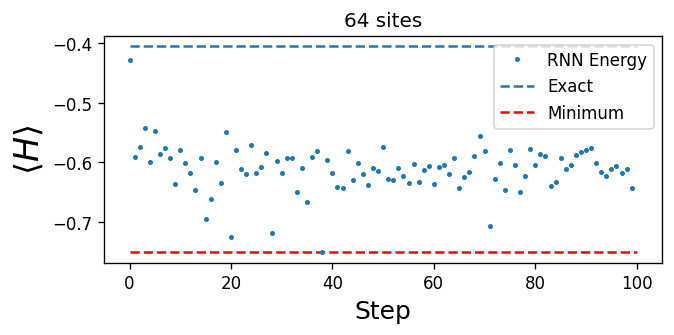

Final Energy -0.6044720874892341 (Exact Energy is -0.40518005298872917)
Final Error after 100 epochs is 0.19929203450050492
The lowest energy achieved by the model was -0.7510183453559875.


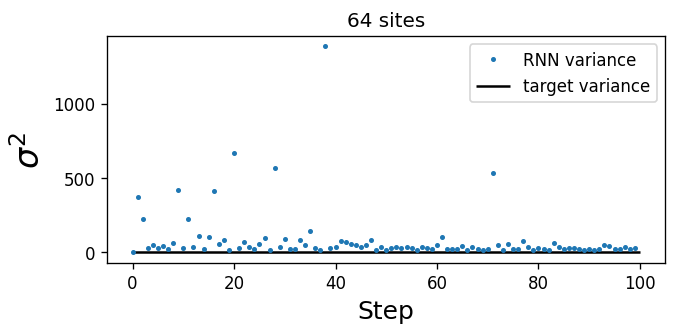

Final Variance after 100 epochs is 27.601580407884384


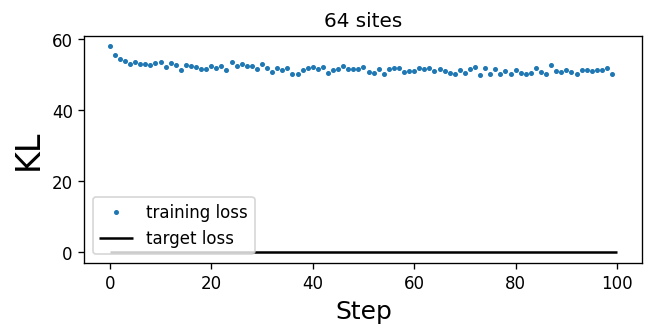

In [17]:
energy = []
variance = []
cost = []

def main():
    config = {
        # System Parameters
        'name': 'none',
        'Lx': 8,
        'Ly': 8,
        'V': 7,
        'Omega': 1.0,
        'delta': 1.0,
        'trunc': 100,
        
        # RNN & Training Parameters
        'RNN': 'TwoD',
        'nh': 11, 
        'lr': 5e-4, 
        'weight_sharing': True,
        'seed': 1234,
        'epochs':100,
        'ns': 1000,
        'batch_size': 100,
        
        # Etc
        'Print':True,
        'Write_Data': False,
        'Plot': True
        }
    
    return train_w_data(config,energy,variance,cost)


if __name__ == "__main__":
    model = main()

In [32]:
# load data
from dset_helpers import load_QMC_data,create_tf_dataset
exactE,uploaded_data = load_QMC_data(8)
data_tf = create_tf_dataset(uploaded_data,10)

[[1 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 1 ... 0 1 0]
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 0 1 0]]
<TensorSliceDataset element_spec=TensorSpec(shape=(64,), dtype=tf.int64, name=None)>


In [34]:
wf = model[0]

In [35]:
print(wf.N)

64


In [38]:
dset = data_tf.shuffle(len(data_tf))
dset = dset.batch(100)
for i,batch in enumerate(dset):
    print(f"batch #{i}")
    data_logpsi = wf.logpsi(batch)
    data_eloc = wf.localenergy(batch,data_logpsi)/wf.N
    print(np.mean(data_eloc))

batch #0
-0.7860388
batch #1
-0.5612183
batch #2
-0.5765022
batch #3
-0.7966345
batch #4
-0.7302889
batch #5
-0.7653579
batch #6
-0.65180135
batch #7
-0.60795045
batch #8
-0.57512236
batch #9
-0.61296505
batch #10
-0.6268184
batch #11
-0.748963
batch #12
-0.98531556
batch #13
-0.66808456
batch #14
-0.543851
batch #15
-0.63483036
batch #16
-0.6495593
batch #17
-0.5432067
batch #18
-0.63188094
batch #19
-0.57543826
batch #20
-0.5940929
batch #21


KeyboardInterrupt: 

The problem here is that we are using the RNN eloc calculation... but we should instead apply the hamiltonian straight to these samples or something like that to get a more accurate energy

at the end of the day, we know what the average energy of all the samples is (exact energy) which ejaaz calculated

which means that the log probs probably are not accurate... which means the weights and biases are not properly trained

in the calculations above, we are straight up feeding the data through log probs and eloc, so they should be ball park around the exact energy (since the exact energy came from those samples) IFF the RNN is properly and well trained

The system is an array of 4 by 4 Rydberg Atoms.
The experimental parameters are: V = 7, delta = 1.0, Omega = 1.0.
Training a two-D RNN wave function with 6 hidden units and shared weights = True.
W:0 (288,)
b:0 (6,)
dense_3/kernel:0 (12,)
dense_3/bias:0 (2,)
The sum of params is 308
Step #1
Energy = 0.3177099823951721
Variance = 9.397409439086914
 
Step #2
Energy = 0.30714666843414307
Variance = 9.450164794921875
 
Step #3
Energy = 0.25637149810791016
Variance = 9.154820442199707
 
Step #4
Energy = 0.2285373955965042
Variance = 7.790661334991455
 
Step #5
Energy = 0.16974672675132751
Variance = 7.888339996337891
 
Step #6
Energy = 0.11831452697515488
Variance = 6.694116115570068
 
Step #7
Energy = 0.13037124276161194
Variance = 6.749210834503174
 
Step #8
Energy = 0.03785627335309982
Variance = 5.399957656860352
 
Step #9
Energy = 0.03319164365530014
Variance = 4.942957401275635
 
Step #10
Energy = -0.016596728935837746
Variance = 4.266111373901367
 
Step #11
Energy = -0.03104137443006

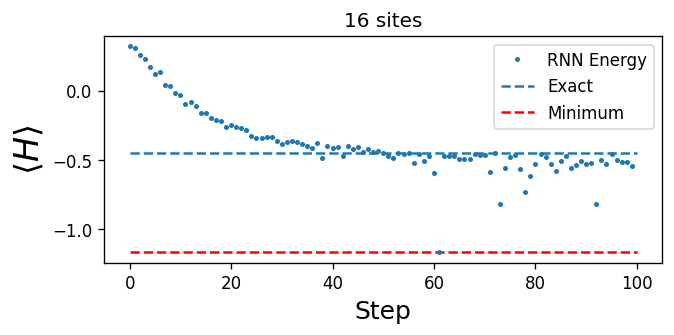

Final Energy -0.5422431727250417 (Exact Energy is -0.4534132086591546)
Final Error after 100 epochs is 0.08882996406588717
The lowest energy achieved by the model was -1.1667568683624268.


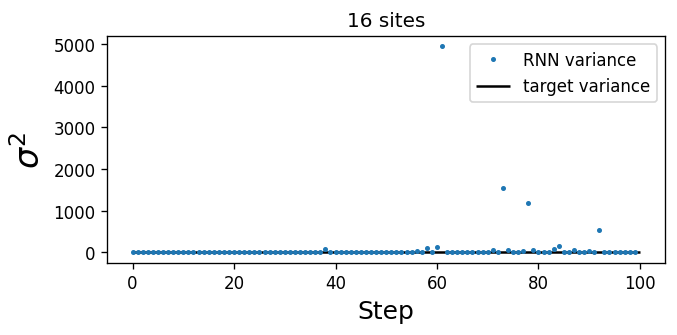

Final Variance after 100 epochs is 72.48940960566203


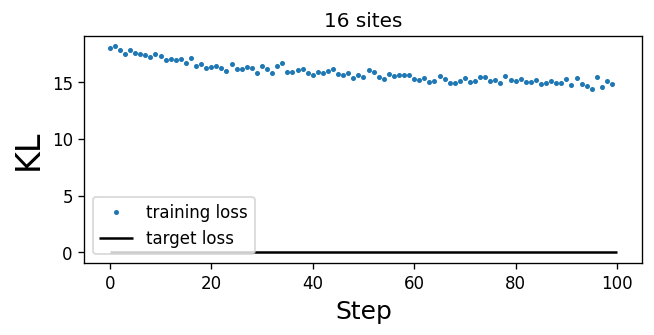

In [9]:
energy = []
variance = []
cost = []

def main():
    config = {
        # System Parameters
        'name': 'none',
        'Lx': 4,
        'Ly': 4,
        'V': 7,
        'Omega': 1.0,
        'delta': 1.0,
        'trunc': 100,
        
        # RNN & Training Parameters
        'RNN': 'TwoD',
        'nh': 6, 
        'lr': 5e-5, 
        'weight_sharing': True,
        'seed': 1234,
        'epochs':100,
        'ns': 1000,
        'batch_size': 100,
        
        # Etc
        'Print':True,
        'Write_Data': False,
        'Plot': True
        }
    
    return train_w_data(config,energy,variance,cost)


if __name__ == "__main__":
    model = main()

The system is an array of 4 by 4 Rydberg Atoms.
The experimental parameters are: V = 7, delta = 1.0, Omega = 1.0.
Training a two-D RNN wave function with 6 hidden units and shared weights = True.
W:0 (288,)
b:0 (6,)
dense_16/kernel:0 (12,)
dense_16/bias:0 (2,)
The sum of params is 308
[[1 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]]
<TensorSliceDataset element_spec=TensorSpec(shape=(16,), dtype=tf.int64, name=None)>
Step #1
Energy = 0.347880482673645
Variance = 9.947661399841309
 
Step #2
Energy = 0.3488251566886902
Variance = 10.164124488830566
 
Step #3
Energy = 0.3162959814071655
Variance = 10.147787094116211
 
Step #4
Energy = 0.31762126088142395
Variance = 8.971508026123047
 
Step #5
Energy = 0.27835774421691895
Variance = 9.370400428771973
 
Step #6
Energy = 0.23747515678405762
Variance = 8.533556938171387
 
Step #7
Energy = 0.27537164092063904
Variance = 8.817168235778809
 
Step #8
Energy = 0.1880220621824264

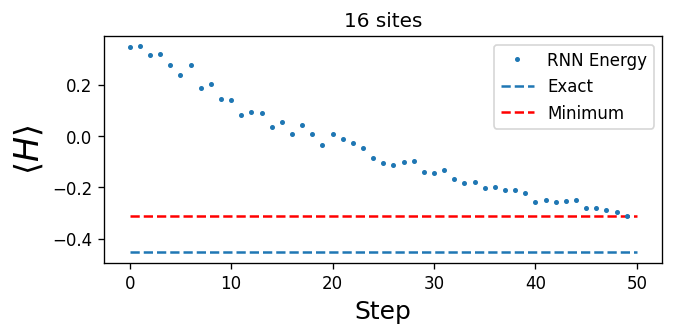

Final Energy -0.26892005072699654 (Exact Energy is -0.4534132086591546)
Final Error after 50 epochs is 0.18449315793215804
The lowest energy achieved by the model was -0.3106714189052582.


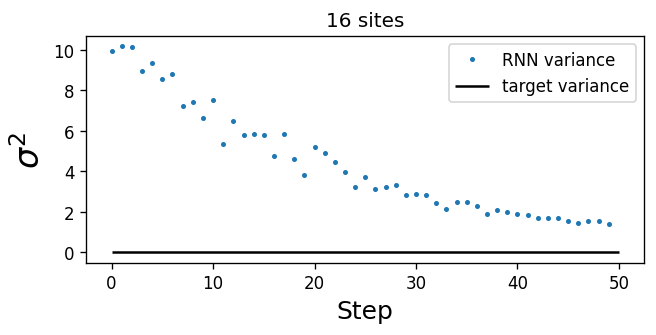

Final Variance after 50 epochs is 1.6552300850550334


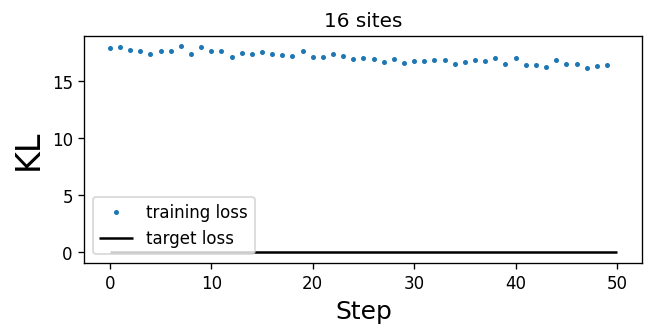

In [49]:
energy = []
variance = []
cost = []

def main():
    config = {
        # System Parameters
        'name': 'none',
        'Lx': 4,
        'Ly': 4,
        'V': 7,
        'Omega': 1.0,
        'delta': 1.0,
        'trunc': 100,
        
        # RNN & Training Parameters
        'RNN': 'TwoD',
        'nh': 6, 
        'lr': 1e-5, 
        'weight_sharing': True,
        'seed': 1234,
        'epochs':50,
        'ns': 1000,
        'batch_size': 100,
        
        # Etc
        'Print':True,
        'Write_Data': False,
        'Plot': True
        }
    
    return train_w_data(config,energy,variance,cost)


if __name__ == "__main__":
    model = main()

trained until *BEFORE* the RNN starts freaking out variance wise, but it still doesn't seem to help (see the batch eloc calculations below)

In [50]:
# load data
from dset_helpers import load_QMC_data,create_tf_dataset
exactE,uploaded_data = load_QMC_data(4)
data_tf = create_tf_dataset(uploaded_data,10)
wf = model[0]
dset = data_tf.shuffle(len(data_tf))
dset = dset.batch(100)
for i,batch in enumerate(dset):
    print(f"batch #{i}")
    data_logpsi = wf.logpsi(batch)
    data_eloc = wf.localenergy(batch,data_logpsi)/wf.N
    print(np.mean(data_eloc))

[[1 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]]
<TensorSliceDataset element_spec=TensorSpec(shape=(16,), dtype=tf.int64, name=None)>
batch #0
-0.55483234
batch #1
-0.57587755
batch #2
-0.59202445
batch #3
-0.5822313
batch #4
-0.592519
batch #5
-0.57248896
batch #6
-0.6212394
batch #7
-0.5949506
batch #8
-0.55642825
batch #9
-0.5924108
batch #10
-0.59419864
batch #11
-0.5779523
batch #12
-0.59215003
batch #13
-0.5835737
batch #14
-0.5622267
batch #15
-0.57699347
batch #16
-0.5770858
batch #17
-0.5845102
batch #18
-0.5731135
batch #19
-0.55764997
batch #20
-0.5995525
batch #21
-0.5925797
batch #22
-0.5673163
batch #23
-0.5660366
batch #24
-0.5677138
batch #25
-0.6028424
batch #26
-0.5762467
batch #27
-0.56676394
batch #28
-0.59117144
batch #29
-0.5815447
batch #30
-0.5914056
batch #31
-0.58431834
batch #32
-0.5813646
batch #33
-0.58321315
batch #34
-0.562351
batch #35
-0.5793555
batch #36
-0.6386778
batch #37
-0.5879

The system is an array of 8 by 8 Rydberg Atoms.
The experimental parameters are: V = 7, delta = 1.0, Omega = 1.0.
Training a one-D RNN wave function with 16 hidden units and shared weights.
gru_2/gru_cell_2/kernel:0 (96,)
gru_2/gru_cell_2/recurrent_kernel:0 (768,)
gru_2/gru_cell_2/bias:0 (96,)
dense_8/kernel:0 (32,)
dense_8/bias:0 (2,)
The sum of params is 994
Step #1
Energy = -0.1124090850353241
Variance = 3.2169790267944336
 
Step #2
Energy = -0.21039056777954102
Variance = 1.8610121011734009
 
Step #3
Energy = -0.23925979435443878
Variance = 1.192728042602539
 
Step #4
Energy = -0.25872430205345154
Variance = 1.0105913877487183
 
Step #5
Energy = -0.25807905197143555
Variance = 1.1271313428878784
 
Step #6
Energy = -0.2655845284461975
Variance = 1.0344364643096924
 
Step #7
Energy = -0.28549012541770935
Variance = 0.85596764087677
 
Step #8
Energy = -0.2999536693096161
Variance = 0.7544629573822021
 
Step #9
Energy = -0.3107200264930725
Variance = 0.6813973188400269
 
Step #10
Energ

Step #112
Energy = -0.39117032289505005
Variance = 0.051410239189863205
 
Step #113
Energy = -0.39248499274253845
Variance = 0.05234687030315399
 
Step #114
Energy = -0.39277926087379456
Variance = 0.046433012932538986
 
Step #115
Energy = -0.3937598764896393
Variance = 0.045315422117710114
 
Step #116
Energy = -0.3909864127635956
Variance = 0.06545987725257874
 
Step #117
Energy = -0.3930523991584778
Variance = 0.052665166556835175
 
Step #118
Energy = -0.3927723467350006
Variance = 0.06243586912751198
 
Step #119
Energy = -0.3935067653656006
Variance = 0.06625628471374512
 
Step #120
Energy = -0.3920977711677551
Variance = 0.0567399300634861
 
Step #121
Energy = -0.3915053606033325
Variance = 0.05475390702486038
 
Step #122
Energy = -0.3939708173274994
Variance = 0.04246528446674347
 
Step #123
Energy = -0.39338651299476624
Variance = 0.06415434926748276
 
Step #124
Energy = -0.3943621814250946
Variance = 0.050151024013757706
 
Step #125
Energy = -0.3919203579425812
Variance = 0.0595

Step #225
Energy = -0.3960069417953491
Variance = 0.03112281858921051
 
Step #226
Energy = -0.3951752781867981
Variance = 0.030301006510853767
 
Step #227
Energy = -0.39526790380477905
Variance = 0.03489319607615471
 
Step #228
Energy = -0.39688464999198914
Variance = 0.029572799801826477
 
Step #229
Energy = -0.3975712060928345
Variance = 0.036802954971790314
 
Step #230
Energy = -0.3974417746067047
Variance = 0.04115547984838486
 
Step #231
Energy = -0.3976568281650543
Variance = 0.04247957468032837
 
Step #232
Energy = -0.3959273397922516
Variance = 0.029714247211813927
 
Step #233
Energy = -0.39776986837387085
Variance = 0.07754788547754288
 
Step #234
Energy = -0.39557018876075745
Variance = 0.03892509639263153
 
Step #235
Energy = -0.3973162770271301
Variance = 0.024044383317232132
 
Step #236
Energy = -0.397441029548645
Variance = 0.02802741341292858
 
Step #237
Energy = -0.39645662903785706
Variance = 0.036147769540548325
 
Step #238
Energy = -0.3958492875099182
Variance = 0.04

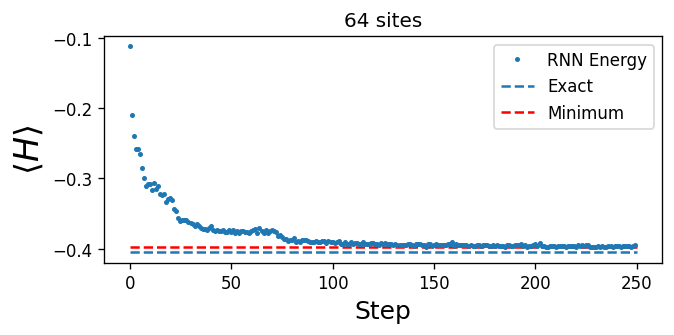

Final Energy -0.39651111761728924 (Exact Energy is -0.40518005298872917)
Final Error after 250 epochs is 0.008668935371439923
The lowest energy achieved by the model was -0.397769957780838.


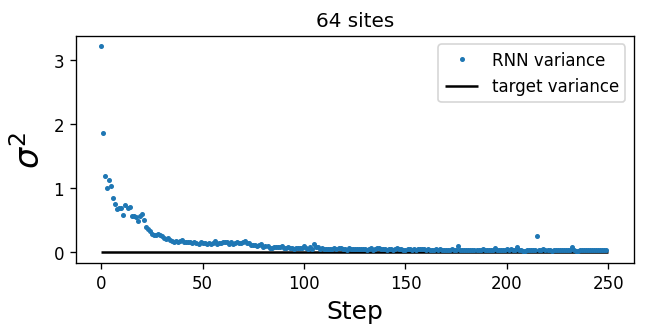

Final Variance after 250 epochs is 0.03643790694574515


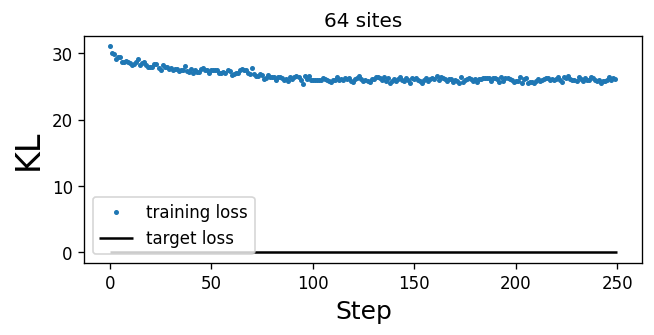

In [15]:
energy = []
variance = []
cost = []

def main():
    config = {
        # System Parameters
        'name': 'none',
        'Lx': 8,
        'Ly': 8,
        'V': 7,
        'Omega': 1.0,
        'delta': 1.0,
        'trunc': 100,
        
        # RNN & Training Parameters
        'RNN': 'OneD',
        'nh': 16, 
        'lr': 1e-3, 
        'weight_sharing': True,
        'seed': 1234,
        'epochs':250,
        'ns': 1000,
        'batch_size': 100,
        
        # Etc
        'Print':True,
        'Write_Data': False,
        'Plot': True
        }
    
    return train_w_data(config,energy,variance,cost)


if __name__ == "__main__":
    model = main()

The system is an array of 4 by 4 Rydberg Atoms.
The experimental parameters are: V = 7, delta = 1.0, Omega = 1.0.
Training a one-D RNN wave function with 8 hidden units and shared weights.
gru_8/gru_cell_8/kernel:0 (48,)
gru_8/gru_cell_8/recurrent_kernel:0 (192,)
gru_8/gru_cell_8/bias:0 (48,)
dense_8/kernel:0 (16,)
dense_8/bias:0 (2,)
The sum of params is 306
Step #1
Energy = 0.7698625922203064
Variance = 18.85716438293457
 
Step #2
Energy = 0.48746636509895325
Variance = 13.609466552734375
 
Step #3
Energy = 0.3231787085533142
Variance = 10.826761245727539
 
Step #4
Energy = 0.16371102631092072
Variance = 7.92612886428833
 
Step #5
Energy = 0.06777030974626541
Variance = 7.098628997802734
 
Step #6
Energy = 0.010860946029424667
Variance = 6.305022716522217
 
Step #7
Energy = 0.016615035012364388
Variance = 5.822830677032471
 
Step #8
Energy = -0.04935157671570778
Variance = 5.228625297546387
 
Step #9
Energy = -0.02276037074625492
Variance = 5.044839859008789
 
Step #10
Energy = -0.05

Step #113
Energy = -0.36217737197875977
Variance = 0.578870415687561
 
Step #114
Energy = -0.3641475737094879
Variance = 0.6383524537086487
 
Step #115
Energy = -0.370376855134964
Variance = 0.5522313714027405
 
Step #116
Energy = -0.365682989358902
Variance = 0.5397157073020935
 
Step #117
Energy = -0.3763394057750702
Variance = 0.4827059209346771
 
Step #118
Energy = -0.36857178807258606
Variance = 0.574033796787262
 
Step #119
Energy = -0.37711697816848755
Variance = 0.5228145718574524
 
Step #120
Energy = -0.3790549337863922
Variance = 0.4571094214916229
 
Step #121
Energy = -0.3721430003643036
Variance = 0.48678699135780334
 
Step #122
Energy = -0.37425559759140015
Variance = 0.5113991498947144
 
Step #123
Energy = -0.3766283094882965
Variance = 0.45894092321395874
 
Step #124
Energy = -0.378937691450119
Variance = 0.4483124613761902
 
Step #125
Energy = -0.3804798424243927
Variance = 0.4923127293586731
 
Step #126
Energy = -0.3769465684890747
Variance = 0.4768863022327423
 
Step 

Step #228
Energy = -0.4000639319419861
Variance = 0.306999146938324
 
Step #229
Energy = -0.3998281955718994
Variance = 0.31689995527267456
 
Step #230
Energy = -0.3885938823223114
Variance = 0.33603760600090027
 
Step #231
Energy = -0.4027957618236542
Variance = 0.2979825437068939
 
Step #232
Energy = -0.40655964612960815
Variance = 0.2856089770793915
 
Step #233
Energy = -0.40358486771583557
Variance = 0.27945202589035034
 
Step #234
Energy = -0.3966839611530304
Variance = 0.32089415192604065
 
Step #235
Energy = -0.39693111181259155
Variance = 0.3044019639492035
 
Step #236
Energy = -0.400299608707428
Variance = 0.3132043778896332
 
Step #237
Energy = -0.4027708172798157
Variance = 0.31342408061027527
 
Step #238
Energy = -0.39537274837493896
Variance = 0.32688140869140625
 
Step #239
Energy = -0.4001311659812927
Variance = 0.29705533385276794
 
Step #240
Energy = -0.39885008335113525
Variance = 0.308437317609787
 
Step #241
Energy = -0.4016427993774414
Variance = 0.3265387713909149

Step #342
Energy = -0.4150647819042206
Variance = 0.2084556519985199
 
Step #343
Energy = -0.41369643807411194
Variance = 0.22631151974201202
 
Step #344
Energy = -0.4073546826839447
Variance = 0.26278284192085266
 
Step #345
Energy = -0.41102439165115356
Variance = 0.23554913699626923
 
Step #346
Energy = -0.4139861464500427
Variance = 0.24380336701869965
 
Step #347
Energy = -0.4089285135269165
Variance = 0.2477881759405136
 
Step #348
Energy = -0.41012826561927795
Variance = 0.22471830248832703
 
Step #349
Energy = -0.4107588827610016
Variance = 0.23032772541046143
 
Step #350
Energy = -0.4103448688983917
Variance = 0.25128909945487976
 
Step #351
Energy = -0.410468190908432
Variance = 0.24714075028896332
 
Step #352
Energy = -0.4097350537776947
Variance = 0.26539936661720276
 
Step #353
Energy = -0.41238147020339966
Variance = 0.26200079917907715
 
Step #354
Energy = -0.4178258180618286
Variance = 0.21083174645900726
 
Step #355
Energy = -0.4152821898460388
Variance = 0.23184122145

Step #456
Energy = -0.4156261384487152
Variance = 0.2293974608182907
 
Step #457
Energy = -0.4143938422203064
Variance = 0.24830351769924164
 
Step #458
Energy = -0.41906431317329407
Variance = 0.21167542040348053
 
Step #459
Energy = -0.4136691391468048
Variance = 0.23196518421173096
 
Step #460
Energy = -0.41237056255340576
Variance = 0.23836258053779602
 
Step #461
Energy = -0.41053593158721924
Variance = 0.23136310279369354
 
Step #462
Energy = -0.4124701917171478
Variance = 0.222246915102005
 
Step #463
Energy = -0.4106052815914154
Variance = 0.2149607241153717
 
Step #464
Energy = -0.41095608472824097
Variance = 0.23857003450393677
 
Step #465
Energy = -0.4106977581977844
Variance = 0.2258146107196808
 
Step #466
Energy = -0.41329312324523926
Variance = 0.24858349561691284
 
Step #467
Energy = -0.4133778512477875
Variance = 0.19877012073993683
 
Step #468
Energy = -0.4128699004650116
Variance = 0.240666925907135
 
Step #469
Energy = -0.4174906611442566
Variance = 0.21364833414554

Step #570
Energy = -0.4112823009490967
Variance = 0.22744494676589966
 
Step #571
Energy = -0.4252435564994812
Variance = 0.1794111132621765
 
Step #572
Energy = -0.42138952016830444
Variance = 0.1756441593170166
 
Step #573
Energy = -0.4205824136734009
Variance = 0.21627283096313477
 
Step #574
Energy = -0.41423189640045166
Variance = 0.2113189399242401
 
Step #575
Energy = -0.41525185108184814
Variance = 0.21425949037075043
 
Step #576
Energy = -0.411774218082428
Variance = 0.20339614152908325
 
Step #577
Energy = -0.41899585723876953
Variance = 0.19868282973766327
 
Step #578
Energy = -0.4180845022201538
Variance = 0.2117869257926941
 
Step #579
Energy = -0.42336219549179077
Variance = 0.21092569828033447
 
Step #580
Energy = -0.41771399974823
Variance = 0.20745305716991425
 
Step #581
Energy = -0.42120227217674255
Variance = 0.21321751177310944
 
Step #582
Energy = -0.41921478509902954
Variance = 0.2170170098543167
 
Step #583
Energy = -0.41979822516441345
Variance = 0.204742580652

Step #684
Energy = -0.42375725507736206
Variance = 0.15702132880687714
 
Step #685
Energy = -0.4222003221511841
Variance = 0.177379310131073
 
Step #686
Energy = -0.4253842830657959
Variance = 0.1818562000989914
 
Step #687
Energy = -0.42942485213279724
Variance = 0.1735595464706421
 
Step #688
Energy = -0.4215551018714905
Variance = 0.19279544055461884
 
Step #689
Energy = -0.4197710454463959
Variance = 0.19253095984458923
 
Step #690
Energy = -0.4207298457622528
Variance = 0.18282578885555267
 
Step #691
Energy = -0.4275163412094116
Variance = 0.1853855848312378
 
Step #692
Energy = -0.42675453424453735
Variance = 0.18986718356609344
 
Step #693
Energy = -0.4282867908477783
Variance = 0.14635640382766724
 
Step #694
Energy = -0.42196038365364075
Variance = 0.17796817421913147
 
Step #695
Energy = -0.42273515462875366
Variance = 0.1970188319683075
 
Step #696
Energy = -0.4240987002849579
Variance = 0.16933651268482208
 
Step #697
Energy = -0.42206114530563354
Variance = 0.218801915645

Step #798
Energy = -0.4288278818130493
Variance = 0.181966632604599
 
Step #799
Energy = -0.4295436441898346
Variance = 0.1617373675107956
 
Step #800
Energy = -0.4290870428085327
Variance = 0.15483075380325317
 
Step #801
Energy = -0.42789578437805176
Variance = 0.14855057001113892
 
Step #802
Energy = -0.43205541372299194
Variance = 0.16056911647319794
 
Step #803
Energy = -0.4305908679962158
Variance = 0.16383716464042664
 
Step #804
Energy = -0.42363283038139343
Variance = 0.18799923360347748
 
Step #805
Energy = -0.4273211359977722
Variance = 0.18460632860660553
 
Step #806
Energy = -0.42644137144088745
Variance = 0.23776981234550476
 
Step #807
Energy = -0.4270818531513214
Variance = 0.15055495500564575
 
Step #808
Energy = -0.42871642112731934
Variance = 0.14996670186519623
 
Step #809
Energy = -0.4334500730037689
Variance = 0.11590910702943802
 
Step #810
Energy = -0.4300250709056854
Variance = 0.16276875138282776
 
Step #811
Energy = -0.4276537597179413
Variance = 0.1709416210

Step #912
Energy = -0.43212342262268066
Variance = 0.12421718239784241
 
Step #913
Energy = -0.4295395612716675
Variance = 0.1632811576128006
 
Step #914
Energy = -0.42678138613700867
Variance = 0.17501361668109894
 
Step #915
Energy = -0.42679160833358765
Variance = 0.14027026295661926
 
Step #916
Energy = -0.4306643009185791
Variance = 0.14038719236850739
 
Step #917
Energy = -0.4296870827674866
Variance = 0.1347816437482834
 
Step #918
Energy = -0.4264053404331207
Variance = 0.15962140262126923
 
Step #919
Energy = -0.4319060444831848
Variance = 0.1234133169054985
 
Step #920
Energy = -0.4272858202457428
Variance = 0.1527067869901657
 
Step #921
Energy = -0.42863866686820984
Variance = 0.1634790003299713
 
Step #922
Energy = -0.4292270243167877
Variance = 0.13970747590065002
 
Step #923
Energy = -0.42843616008758545
Variance = 0.1563595086336136
 
Step #924
Energy = -0.4286930561065674
Variance = 0.1515984684228897
 
Step #925
Energy = -0.4321179687976837
Variance = 0.14179292321205

Step #1027
Energy = -0.4335018992424011
Variance = 0.12400336563587189
 
Step #1028
Energy = -0.432167649269104
Variance = 0.14800070226192474
 
Step #1029
Energy = -0.42735180258750916
Variance = 0.16169404983520508
 
Step #1030
Energy = -0.43350130319595337
Variance = 0.12475993484258652
 
Step #1031
Energy = -0.4238119125366211
Variance = 0.14799712598323822
 
Step #1032
Energy = -0.430030882358551
Variance = 0.17007464170455933
 
Step #1033
Energy = -0.43400853872299194
Variance = 0.14101797342300415
 
Step #1034
Energy = -0.42978498339653015
Variance = 0.19158318638801575
 
Step #1035
Energy = -0.4302709102630615
Variance = 0.16967223584651947
 
Step #1036
Energy = -0.4310345947742462
Variance = 0.13756076991558075
 
Step #1037
Energy = -0.43304669857025146
Variance = 0.13411517441272736
 
Step #1038
Energy = -0.426604300737381
Variance = 0.16703134775161743
 
Step #1039
Energy = -0.430057555437088
Variance = 0.12490184605121613
 
Step #1040
Energy = -0.42938393354415894
Variance 

Step #1139
Energy = -0.4296886622905731
Variance = 0.15277887880802155
 
Step #1140
Energy = -0.4297868013381958
Variance = 0.14947062730789185
 
Step #1141
Energy = -0.42946362495422363
Variance = 0.15611162781715393
 
Step #1142
Energy = -0.4337855279445648
Variance = 0.13678233325481415
 
Step #1143
Energy = -0.428014874458313
Variance = 0.14800280332565308
 
Step #1144
Energy = -0.43127673864364624
Variance = 0.11339578032493591
 
Step #1145
Energy = -0.43124812841415405
Variance = 0.16825009882450104
 
Step #1146
Energy = -0.43227311968803406
Variance = 0.15703074634075165
 
Step #1147
Energy = -0.4320383071899414
Variance = 0.13131487369537354
 
Step #1148
Energy = -0.43894678354263306
Variance = 0.10137566179037094
 
Step #1149
Energy = -0.430007666349411
Variance = 0.15447072684764862
 
Step #1150
Energy = -0.43186092376708984
Variance = 0.12009546160697937
 
Step #1151
Energy = -0.4338739514350891
Variance = 0.1156744658946991
 
Step #1152
Energy = -0.43769195675849915
Varianc

Step #1251
Energy = -0.4325590133666992
Variance = 0.1514149010181427
 
Step #1252
Energy = -0.43644610047340393
Variance = 0.09737400710582733
 
Step #1253
Energy = -0.4332123100757599
Variance = 0.1086484044790268
 
Step #1254
Energy = -0.43318045139312744
Variance = 0.16796767711639404
 
Step #1255
Energy = -0.4274332821369171
Variance = 0.14290796220302582
 
Step #1256
Energy = -0.42970702052116394
Variance = 0.18495044112205505
 
Step #1257
Energy = -0.43236467242240906
Variance = 0.1104150116443634
 
Step #1258
Energy = -0.4341632127761841
Variance = 0.13741539418697357
 
Step #1259
Energy = -0.4313121736049652
Variance = 0.14898832142353058
 
Step #1260
Energy = -0.4259669780731201
Variance = 0.12894582748413086
 
Step #1261
Energy = -0.42898064851760864
Variance = 0.1191905215382576
 
Step #1262
Energy = -0.4313351511955261
Variance = 0.14704954624176025
 
Step #1263
Energy = -0.4243614375591278
Variance = 0.17945002019405365
 
Step #1264
Energy = -0.43119630217552185
Variance 

Step #1364
Energy = -0.4314541220664978
Variance = 0.121705561876297
 
Step #1365
Energy = -0.4312783181667328
Variance = 0.1325821876525879
 
Step #1366
Energy = -0.427811861038208
Variance = 0.21280346810817719
 
Step #1367
Energy = -0.43033602833747864
Variance = 0.13936807215213776
 
Step #1368
Energy = -0.42741867899894714
Variance = 0.21190273761749268
 
Step #1369
Energy = -0.4264342188835144
Variance = 0.185623899102211
 
Step #1370
Energy = -0.4317542016506195
Variance = 0.1781718134880066
 
Step #1371
Energy = -0.4302290976047516
Variance = 0.13524046540260315
 
Step #1372
Energy = -0.4321306645870209
Variance = 0.12976649403572083
 
Step #1373
Energy = -0.4335586428642273
Variance = 0.11049342155456543
 
Step #1374
Energy = -0.4310303330421448
Variance = 0.15909484028816223
 
Step #1375
Energy = -0.43282032012939453
Variance = 0.13371892273426056
 
Step #1376
Energy = -0.43241775035858154
Variance = 0.125888854265213
 
Step #1377
Energy = -0.43134093284606934
Variance = 0.12

Step #1477
Energy = -0.43494588136672974
Variance = 0.12436141073703766
 
Step #1478
Energy = -0.4376761317253113
Variance = 0.10984029620885849
 
Step #1479
Energy = -0.43403396010398865
Variance = 0.10995303094387054
 
Step #1480
Energy = -0.434988409280777
Variance = 0.12356312572956085
 
Step #1481
Energy = -0.4307129979133606
Variance = 0.12147675454616547
 
Step #1482
Energy = -0.4312160611152649
Variance = 0.15592150390148163
 
Step #1483
Energy = -0.42721909284591675
Variance = 0.1780814379453659
 
Step #1484
Energy = -0.4376104772090912
Variance = 0.20126721262931824
 
Step #1485
Energy = -0.4276297986507416
Variance = 0.16661718487739563
 
Step #1486
Energy = -0.43498125672340393
Variance = 0.14074954390525818
 
Step #1487
Energy = -0.4299304485321045
Variance = 0.161808043718338
 
Step #1488
Energy = -0.43542352318763733
Variance = 0.13438007235527039
 
Step #1489
Energy = -0.4333764910697937
Variance = 0.12155736982822418
 
Step #1490
Energy = -0.432431697845459
Variance = 

Step #1590
Energy = -0.4346509277820587
Variance = 0.11157677322626114
 
Step #1591
Energy = -0.43435749411582947
Variance = 0.12441868335008621
 
Step #1592
Energy = -0.4274909198284149
Variance = 0.1993066668510437
 
Step #1593
Energy = -0.42782866954803467
Variance = 0.18340831995010376
 
Step #1594
Energy = -0.4340168535709381
Variance = 0.1456853449344635
 
Step #1595
Energy = -0.4305303394794464
Variance = 0.22730489075183868
 
Step #1596
Energy = -0.4314333498477936
Variance = 0.1324327439069748
 
Step #1597
Energy = -0.4320925176143646
Variance = 0.13850469887256622
 
Step #1598
Energy = -0.4259490966796875
Variance = 0.1782871037721634
 
Step #1599
Energy = -0.42898574471473694
Variance = 0.15240152180194855
 
Step #1600
Energy = -0.432209849357605
Variance = 0.12280039489269257
 
Step #1601
Energy = -0.4357927739620209
Variance = 0.17475903034210205
 
Step #1602
Energy = -0.4372353255748749
Variance = 0.11914776265621185
 
Step #1603
Energy = -0.43800270557403564
Variance = 0

Step #1703
Energy = -0.4326295554637909
Variance = 0.20976147055625916
 
Step #1704
Energy = -0.4332828223705292
Variance = 0.11554688960313797
 
Step #1705
Energy = -0.430245965719223
Variance = 0.1687919646501541
 
Step #1706
Energy = -0.4321559965610504
Variance = 0.15257367491722107
 
Step #1707
Energy = -0.4290236234664917
Variance = 0.17872340977191925
 
Step #1708
Energy = -0.43484076857566833
Variance = 0.10960549861192703
 
Step #1709
Energy = -0.431029349565506
Variance = 0.144399031996727
 
Step #1710
Energy = -0.42887553572654724
Variance = 0.13406792283058167
 
Step #1711
Energy = -0.4275806248188019
Variance = 0.1337355524301529
 
Step #1712
Energy = -0.42642641067504883
Variance = 0.1722278892993927
 
Step #1713
Energy = -0.4297797977924347
Variance = 0.1311054825782776
 
Step #1714
Energy = -0.42949819564819336
Variance = 0.16595371067523956
 
Step #1715
Energy = -0.42474547028541565
Variance = 0.16250766813755035
 
Step #1716
Energy = -0.43136394023895264
Variance = 0.

Step #1816
Energy = -0.4334132671356201
Variance = 0.11858107149600983
 
Step #1817
Energy = -0.4360292851924896
Variance = 0.30341392755508423
 
Step #1818
Energy = -0.4322819113731384
Variance = 0.10840857028961182
 
Step #1819
Energy = -0.43436384201049805
Variance = 0.17418740689754486
 
Step #1820
Energy = -0.43511566519737244
Variance = 0.1462828665971756
 
Step #1821
Energy = -0.4329473078250885
Variance = 0.12196752429008484
 
Step #1822
Energy = -0.4293304979801178
Variance = 0.1505630761384964
 
Step #1823
Energy = -0.43459784984588623
Variance = 0.12361124902963638
 
Step #1824
Energy = -0.43017643690109253
Variance = 0.12771384418010712
 
Step #1825
Energy = -0.43120676279067993
Variance = 0.14958438277244568
 
Step #1826
Energy = -0.4240286648273468
Variance = 0.15678100287914276
 
Step #1827
Energy = -0.43136653304100037
Variance = 0.14073507487773895
 
Step #1828
Energy = -0.42681556940078735
Variance = 0.1547887921333313
 
Step #1829
Energy = -0.43556636571884155
Varian

Step #1929
Energy = -0.43137380480766296
Variance = 0.18325665593147278
 
Step #1930
Energy = -0.4329394996166229
Variance = 0.20642541348934174
 
Step #1931
Energy = -0.4298206865787506
Variance = 0.17691797018051147
 
Step #1932
Energy = -0.4277893602848053
Variance = 0.14155887067317963
 
Step #1933
Energy = -0.43142181634902954
Variance = 0.1400720477104187
 
Step #1934
Energy = -0.4314180016517639
Variance = 0.13748787343502045
 
Step #1935
Energy = -0.4237193465232849
Variance = 0.14369481801986694
 
Step #1936
Energy = -0.43098586797714233
Variance = 0.21760991215705872
 
Step #1937
Energy = -0.43918538093566895
Variance = 0.16428643465042114
 
Step #1938
Energy = -0.4342605173587799
Variance = 0.13697728514671326
 
Step #1939
Energy = -0.4396931827068329
Variance = 0.34967705607414246
 
Step #1940
Energy = -0.43036937713623047
Variance = 0.14549075067043304
 
Step #1941
Energy = -0.4319456219673157
Variance = 0.14484722912311554
 
Step #1942
Energy = -0.42892682552337646
Varian

Step #2043
Energy = -0.43305104970932007
Variance = 0.21878981590270996
 
Step #2044
Energy = -0.4335629940032959
Variance = 0.12517786026000977
 
Step #2045
Energy = -0.43496373295783997
Variance = 0.11143016070127487
 
Step #2046
Energy = -0.43258553743362427
Variance = 0.1876310557126999
 
Step #2047
Energy = -0.4331097900867462
Variance = 0.15076130628585815
 
Step #2048
Energy = -0.4233468770980835
Variance = 0.18866339325904846
 
Step #2049
Energy = -0.4339407980442047
Variance = 0.17326074838638306
 
Step #2050
Energy = -0.4308377206325531
Variance = 0.22019682824611664
 
Step #2051
Energy = -0.43071433901786804
Variance = 0.250729501247406
 
Step #2052
Energy = -0.4260299503803253
Variance = 0.25653865933418274
 
Step #2053
Energy = -0.43128880858421326
Variance = 0.20431096851825714
 
Step #2054
Energy = -0.44208723306655884
Variance = 0.22637954354286194
 
Step #2055
Energy = -0.42958661913871765
Variance = 0.1940115988254547
 
Step #2056
Energy = -0.4338427186012268
Variance

Step #2156
Energy = -0.43121764063835144
Variance = 0.19303305447101593
 
Step #2157
Energy = -0.43590033054351807
Variance = 0.14257602393627167
 
Step #2158
Energy = -0.4332374632358551
Variance = 0.12732307612895966
 
Step #2159
Energy = -0.4327821731567383
Variance = 0.1438935548067093
 
Step #2160
Energy = -0.4312422573566437
Variance = 0.13789023458957672
 
Step #2161
Energy = -0.4283651113510132
Variance = 0.14476458728313446
 
Step #2162
Energy = -0.43400588631629944
Variance = 0.15681684017181396
 
Step #2163
Energy = -0.42755818367004395
Variance = 0.14931802451610565
 
Step #2164
Energy = -0.4379573464393616
Variance = 0.10417483001947403
 
Step #2165
Energy = -0.42816057801246643
Variance = 0.21220621466636658
 
Step #2166
Energy = -0.4289487898349762
Variance = 0.17475193738937378
 
Step #2167
Energy = -0.4334615170955658
Variance = 0.13026131689548492
 
Step #2168
Energy = -0.4310966432094574
Variance = 0.15120695531368256
 
Step #2169
Energy = -0.43328383564949036
Varian

Step #2269
Energy = -0.4265330135822296
Variance = 0.16529534757137299
 
Step #2270
Energy = -0.4261690080165863
Variance = 0.14543454349040985
 
Step #2271
Energy = -0.4349158704280853
Variance = 0.10391425341367722
 
Step #2272
Energy = -0.4234035611152649
Variance = 0.1728716790676117
 
Step #2273
Energy = -0.4282098710536957
Variance = 0.16928112506866455
 
Step #2274
Energy = -0.4319625794887543
Variance = 0.16454629600048065
 
Step #2275
Energy = -0.4315151274204254
Variance = 0.24095192551612854
 
Step #2276
Energy = -0.43164727091789246
Variance = 0.171196848154068
 
Step #2277
Energy = -0.4285584092140198
Variance = 0.14887753129005432
 
Step #2278
Energy = -0.43093958497047424
Variance = 0.13230936229228973
 
Step #2279
Energy = -0.4318549931049347
Variance = 0.10524816811084747
 
Step #2280
Energy = -0.4335247576236725
Variance = 0.16343185305595398
 
Step #2281
Energy = -0.43077459931373596
Variance = 0.14935632050037384
 
Step #2282
Energy = -0.4315098226070404
Variance = 

Step #2383
Energy = -0.4315124452114105
Variance = 0.1610371470451355
 
Step #2384
Energy = -0.4360261559486389
Variance = 0.1527223438024521
 
Step #2385
Energy = -0.4290584623813629
Variance = 0.16776001453399658
 
Step #2386
Energy = -0.432948499917984
Variance = 0.1257043182849884
 
Step #2387
Energy = -0.427668035030365
Variance = 0.1516461819410324
 
Step #2388
Energy = -0.430539071559906
Variance = 0.23813773691654205
 
Step #2389
Energy = -0.42938774824142456
Variance = 0.13866908848285675
 
Step #2390
Energy = -0.42867356538772583
Variance = 0.1819646805524826
 
Step #2391
Energy = -0.4303985834121704
Variance = 0.19550977647304535
 
Step #2392
Energy = -0.4309483766555786
Variance = 0.14455637335777283
 
Step #2393
Energy = -0.4334094226360321
Variance = 0.25142809748649597
 
Step #2394
Energy = -0.42839178442955017
Variance = 0.1709689050912857
 
Step #2395
Energy = -0.4254028797149658
Variance = 0.20746822655200958
 
Step #2396
Energy = -0.4291436970233917
Variance = 0.1287

Step #2497
Energy = -0.4284474551677704
Variance = 0.17619751393795013
 
Step #2498
Energy = -0.4282524287700653
Variance = 0.16389502584934235
 
Step #2499
Energy = -0.429720014333725
Variance = 0.14154411852359772
 
Step #2500
Energy = -0.43072208762168884
Variance = 0.14090056717395782
 


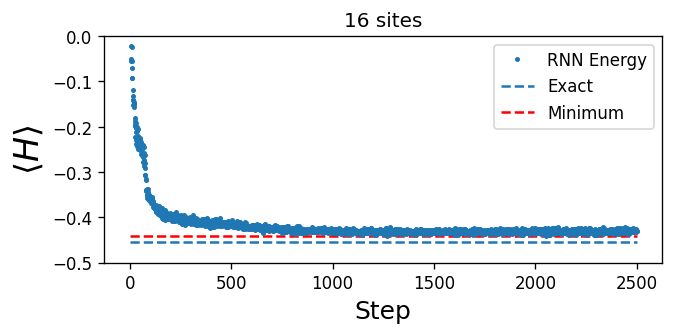

Final Energy -0.43002909753057694 (Exact Energy is -0.4534132086591546)
Final Error after 2500 epochs is 0.023384111128577634
The lowest energy achieved by the model was -0.44208723306655884.


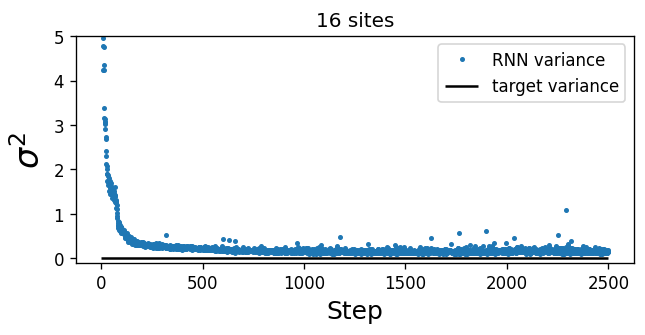

Final Variance after 2500 epochs is 0.15334272384643555


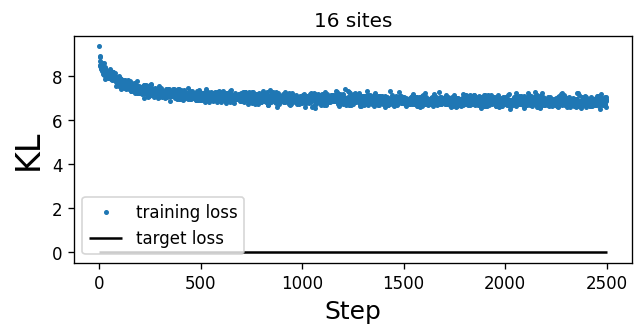

In [17]:
energy = []
variance = []
cost = []

def main():
    config = {
        # System Parameters
        'name': 'none',
        'Lx': 4,
        'Ly': 4,
        'V': 7,
        'Omega': 1.0,
        'delta': 1.0,
        'trunc': 100,
        
        # RNN & Training Parameters
        'RNN': 'OneD',
        'nh': 8, 
        'lr': 1e-3, 
        'weight_sharing': True,
        'seed': 1234,
        'epochs':2500,
        'ns': 1000,
        'batch_size': 100,
        
        # Etc
        'Print':True,
        'Write_Data': False,
        'Plot': True
        }
    
    return train_w_data(config,energy,variance,cost)


if __name__ == "__main__":
    model = main()

The system is an array of 4 by 4 Rydberg Atoms.
The experimental parameters are: V = 7, delta = 1.0, Omega = 1.0.
Training a one-D RNN wave function with 8 hidden units and shared weights.
gru_3/gru_cell_3/kernel:0 (48,)
gru_3/gru_cell_3/recurrent_kernel:0 (192,)
gru_3/gru_cell_3/bias:0 (48,)
dense_11/kernel:0 (16,)
dense_11/bias:0 (2,)
The sum of params is 306
[[1 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]]
<TensorSliceDataset element_spec=TensorSpec(shape=(16,), dtype=tf.int64, name=None)>
Step #1
Energy = -0.05328214913606644
Variance = 4.631044864654541
 
Step #2
Energy = -0.15453258156776428
Variance = 2.709902286529541
 
Step #3
Energy = -0.20186395943164825
Variance = 1.9252779483795166
 
Step #4
Energy = -0.2313004732131958
Variance = 1.5294655561447144
 
Step #5
Energy = -0.25480878353118896
Variance = 1.4400218725204468
 
Step #6
Energy = -0.24549062550067902
Variance = 1.511917233467102
 
Step #7
Energy 

Step #109
Energy = -0.43053504824638367
Variance = 0.18927101790905
 
Step #110
Energy = -0.4283837378025055
Variance = 0.1737307757139206
 
Step #111
Energy = -0.42695823311805725
Variance = 0.19027544558048248
 
Step #112
Energy = -0.43404123187065125
Variance = 0.2715311050415039
 
Step #113
Energy = -0.43428653478622437
Variance = 0.1613626629114151
 
Step #114
Energy = -0.4298936128616333
Variance = 0.17678695917129517
 
Step #115
Energy = -0.43251994252204895
Variance = 0.13273289799690247
 
Step #116
Energy = -0.4323198199272156
Variance = 0.161211758852005
 
Step #117
Energy = -0.43310365080833435
Variance = 0.13435044884681702
 
Step #118
Energy = -0.4329676628112793
Variance = 0.18153555691242218
 
Step #119
Energy = -0.43511277437210083
Variance = 0.16228251159191132
 
Step #120
Energy = -0.43419572710990906
Variance = 0.1536017507314682
 
Step #121
Energy = -0.4317173659801483
Variance = 0.13784432411193848
 
Step #122
Energy = -0.4323686361312866
Variance = 0.1957102566957

Step #223
Energy = -0.43674224615097046
Variance = 0.10487021505832672
 
Step #224
Energy = -0.4362223148345947
Variance = 0.1381065547466278
 
Step #225
Energy = -0.44063684344291687
Variance = 0.1998489648103714
 
Step #226
Energy = -0.43974530696868896
Variance = 0.14928002655506134
 
Step #227
Energy = -0.43497133255004883
Variance = 0.13569757342338562
 
Step #228
Energy = -0.43582531809806824
Variance = 0.1302301585674286
 
Step #229
Energy = -0.44229593873023987
Variance = 0.09576202929019928
 
Step #230
Energy = -0.43362683057785034
Variance = 0.1467060148715973
 
Step #231
Energy = -0.4419216811656952
Variance = 0.15844374895095825
 
Step #232
Energy = -0.4370623826980591
Variance = 0.20538245141506195
 
Step #233
Energy = -0.4446917772293091
Variance = 0.07922693341970444
 
Step #234
Energy = -0.4364563226699829
Variance = 0.17916058003902435
 
Step #235
Energy = -0.4338310956954956
Variance = 0.1396970897912979
 
Step #236
Energy = -0.4421440362930298
Variance = 0.0834578052

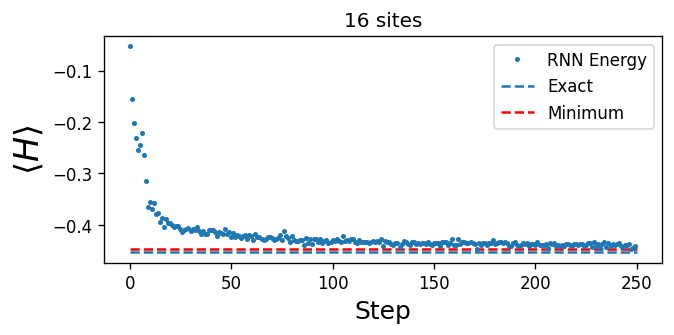

Final Energy -0.4400630229049259 (Exact Energy is -0.4534132086591546)
Final Error after 250 epochs is 0.013350185754228694
The lowest energy achieved by the model was -0.4471602141857147.


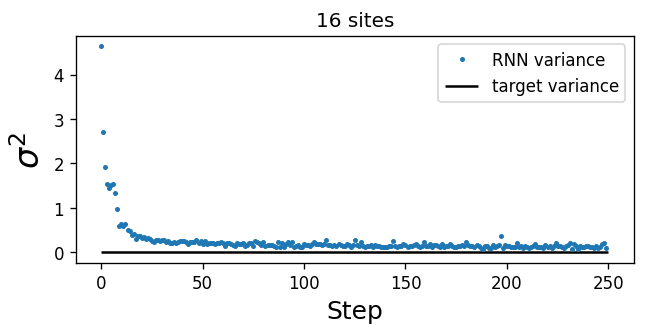

Final Variance after 250 epochs is 0.1367879973517524


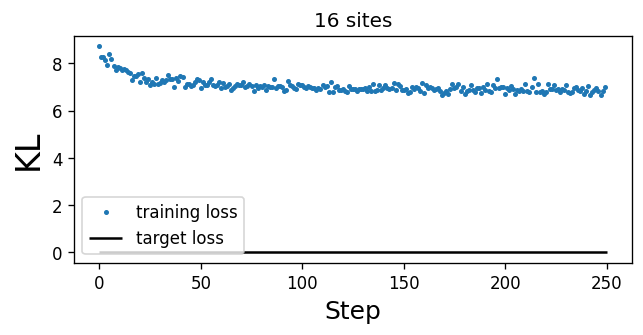

In [39]:
energy = []
variance = []
cost = []

def main():
    config = {
        # System Parameters
        'name': 'none',
        'Lx': 4,
        'Ly': 4,
        'V': 7,
        'Omega': 1.0,
        'delta': 1.0,
        'trunc': 100,
        
        # RNN & Training Parameters
        'RNN': 'OneD',
        'nh': 8, 
        'lr': 1e-3, 
        'weight_sharing': True,
        'seed': 1234,
        'epochs':250,
        'ns': 1000,
        'batch_size': 100,
        
        # Etc
        'Print':True,
        'Write_Data': False,
        'Plot': True
        }
    
    return train_w_data(config,energy,variance,cost)


if __name__ == "__main__":
    model = main()

In [41]:
# load data
from dset_helpers import load_QMC_data,create_tf_dataset
exactE,uploaded_data = load_QMC_data(4)
data_tf = create_tf_dataset(uploaded_data,10)
wf = model[0]
dset = data_tf.shuffle(len(data_tf))
dset = dset.batch(100)
for i,batch in enumerate(dset):
    print(f"batch #{i}")
    data_logpsi = wf.logpsi(batch)
    data_eloc = wf.localenergy(batch,data_logpsi)/wf.N
    print(np.mean(data_eloc))

[[1 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]]
<TensorSliceDataset element_spec=TensorSpec(shape=(16,), dtype=tf.int64, name=None)>
batch #0
-0.4534969
batch #1
-0.45756736
batch #2
-0.46824303
batch #3
-0.45878544
batch #4
-0.45282242
batch #5
-0.45498005
batch #6
-0.45790595
batch #7
-0.49726164
batch #8
-0.46528846
batch #9
-0.46189713
batch #10
-0.45977345
batch #11
-0.46084568
batch #12
-0.46057883
batch #13
-0.4711759
batch #14
-0.48353282
batch #15
-0.46352154
batch #16
-0.44809955
batch #17
-0.5062711
batch #18
-0.46828982
batch #19
-0.4702311
batch #20
-0.45463744
batch #21
-0.4755003
batch #22
-0.4543127
batch #23
-0.45304176
batch #24
-0.455646
batch #25
-0.4663722
batch #26
-0.45550254
batch #27
-0.45483002
batch #28
-0.45319355
batch #29
-0.46566123
batch #30
-0.4663027
batch #31
-0.46109885
batch #32
-0.4838994
batch #33
-0.5066098
batch #34
-0.44877252
batch #35
-0.46383193
batch #36
-0.45959094
bat

Ok so here, all the batches have good energies (close to exact E) because the RNN is well trained

so somehow the 2D RNN is having trouble training and therefore the distribution encoded isn't good and therefore the logprobs aren't accurate and so the energy calculations are bad

this is sad... what is going wrong